<a href="https://colab.research.google.com/github/lingelizabeth/BWSIfinal/blob/master/RandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install peakutils
!pip install imblearn

  Running setup.py bdist_wheel for peakutils ... - done
  Stored in directory: /content/.cache/pip/wheels/1f/ee/00/e1378b61ba846a1eb898da7005254ee13fd09c3beeefefc3f2
Successfully built peakutils
    100% |████████████████████████████████| 41.9MB 703kB/s 
  Running setup.py bdist_wheel for imbalanced-learn ... - \ done
  Stored in directory: /content/.cache/pip/wheels/f4/a9/be/363d606aab48a47f91b3c5aadfbe0e8eb78974997e38a2c7ce
Successfully built imbalanced-learn


In [0]:
from scipy.io import *
from google.colab import files
import matplotlib.pyplot as plt
import numpy as np
import math
import os
import pandas as pd
import random
import peakutils
from sklearn import metrics
from google.colab import files

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import tensorflow as tf
from scipy.interpolate import *
from scipy.signal import *

import keras
from keras import optimizers
from keras.layers import *
from keras.models import *

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from imblearn import over_sampling as imb

Using TensorFlow backend.


In [0]:
#tf.enable_eager_execution()

In [0]:
!git clone https://github.com/liua13/BWSIFinalProject
os.chdir('./BWSIFinalProject')

Cloning into 'BWSIFinalProject'...
remote: Counting objects: 8553, done.
remote: Compressing objects: 100% (8552/8552), done.
remote: Total 8553 (delta 7), reused 8542 (delta 1), pack-reused 0
Receiving objects: 100% (8553/8553), 92.35 MiB | 23.70 MiB/s, done.
Resolving deltas: 100% (7/7), done.


In [0]:
labels = pd.read_csv("labels.csv", names = ['name', 'class'])
labels['class'] = labels['class'].replace('N', 0) # non af                
labels['class'] = labels['class'].replace('A', 1) # af
labels['class'] = labels['class'].replace('O', 2) # other      
labels['class'] = labels['class'].replace('~', 3) # nois
labels = labels.drop(["name"], axis=1)
labels.head()

,class
0,0
1,0
2,0
3,1
4,1


In [0]:
df  = pd.read_csv('allrecords.csv', names = ['record name', 'signals', 'frequency', 'sample number', 'date','time','filename', 'format', 'baseline','adc', 'zeroes', 'initial value','check','block','description', 'NaNs'])
df = df.drop(['signals', 'frequency', 'format', 'baseline', 'filename', 'adc', 'zeroes', 'check', 'block', 'description', 'NaNs'], axis=1)
df['labels'] = labels['class']
df.head()

,record name,sample number,date,time,initial value,labels
0,A00001,9000,2014-05-08,05:05:15,-127,0
1,A00002,9000,2014-05-16,11:05:25,128,0
2,A00003,18000,2014-04-15,12:04:05,56,0
3,A00004,9000,2014-05-01,11:05:48,519,1
4,A00005,18000,2013-12-23,08:12:08,-188,1


In [0]:
files.upload()

Saving medlyticsfinalprojecttest.csv to medlyticsfinalprojecttest.csv


{u'medlyticsfinalprojecttest.csv': "Experiment name:,medlyticsfinalprojecttest\rDuration:, 10 Seconds\rRate:, 100 per second\rSensors:, ECG (ID 1  Exp 1)\rRange:, Arb\rUnits:, Arb\rTime\r'0:0:0.0,4050\r'0:0:0.01,4048\r'0:0:0.02,4048\r'0:0:0.03,4050\r'0:0:0.04,4051\r'0:0:0.05,4049\r'0:0:0.06,4046\r'0:0:0.07,4046\r'0:0:0.08,4046\r'0:0:0.09,4044\r'0:0:0.1,4043\r'0:0:0.11,4042\r'0:0:0.12,4040\r'0:0:0.13,4042\r'0:0:0.14,4043\r'0:0:0.15,4040\r'0:0:0.16,4040\r'0:0:0.17,4040\r'0:0:0.18,4041\r'0:0:0.19,4043\r'0:0:0.2,4042\r'0:0:0.21,4042\r'0:0:0.22,4042\r'0:0:0.23,4044\r'0:0:0.24,4044\r'0:0:0.25,4042\r'0:0:0.26,4040\r'0:0:0.27,4038\r'0:0:0.28,4038\r'0:0:0.29,4035\r'0:0:0.3,4031\r'0:0:0.31,4032\r'0:0:0.32,4029\r'0:0:0.33,4031\r'0:0:0.34,4031\r'0:0:0.35,4025\r'0:0:0.36,4027\r'0:0:0.37,4030\r'0:0:0.38,4034\r'0:0:0.39,4033\r'0:0:0.4,4026\r'0:0:0.41,4025\r'0:0:0.42,4024\r'0:0:0.43,4026\r'0:0:0.44,4027\r'0:0:0.45,4023\r'0:0:0.46,4027\r'0:0:0.47,4004\r'0:0:0.48,3999\r'0:0:0.49,4018\r'0:0:0.5,4011\r'0:

In [0]:
df2 = pd.read_csv('medlyticsfinalprojecttest.csv')
df2 = df2.drop(df2.index[1007:1009])
df2 = df2.drop(df2.index[0:6])
heart_array = np.array(df2[str('medlyticsfinalprojecttest')])

In [0]:
print(heart_array.shape, heart_array)
print(nan_array.shape, nan_array)
print(nan_df.shape)
print(new_nan_array.shape, new_nan_array)

((1001,), array(['4050', '4048', '4048', ..., '1949', '2022', '1994'], dtype=object))
((3003,), array([4050.,   nan,   nan, ..., 1994.,   nan,   nan]))
(3003, 1)
((3003, 1), array([[-0.06453667],
       [-0.65003127],
       [-1.23549284],
       ...,
       [ 4.91193184],
       [ 0.99338966],
       [-2.75820291]]))


In [0]:
nan_array = np.zeros(3*heart_array.shape[0], dtype=float)
for i in range(3*len(heart_array)):
  if i % 3 != 0:
    nan_array[i] = np.nan
  else:
    nan_array[i] = heart_array[i//3]

In [0]:
nan_df = pd.DataFrame(data=nan_array)
nan_df = nan_df.interpolate(method='linear')

a, b = butter(5, .05, 'highpass')
new_nan_array = filtfilt(a, b, nan_df, axis=0)

In [0]:
#new_nan_array = new_nan_array.reshape(1, new_nan_array.shape[0])
heart_dict = {'val': new_nan_array}
type(heart_dict['val']), heart_dict['val']
heart_dict_r = np.reshape(heart_dict['val'], (1, 3003))


In [0]:

#heart_dict_r = {'val':heart_dict_r.astype('int16')}
heart_dict_r, heart_dict_r['val'].shape

({'val': array([[ 0,  0, -1, ...,  4,  0, -2]], dtype=int16)}, (1, 3003))

In [0]:
neulog_data = neulog_signal_array(new_nan_array[0])

In [0]:
neulog_data

array([[-5.47631263e+01,  1.82604622e-02,  1.82604622e-02, ...,
         1.82604622e-02,  1.82604622e-02,  1.82604622e-02]])

In [0]:
os.chdir('./train1')
signal = loadmat('./A00001.mat')
type(signal['val']), signal['val']
os.chdir('..')
print(signal_array(0, 100))

[[-4.74243726e-03 -2.33176896e-01 -4.62694361e-01 ... -2.45292442e-01
  -2.85051773e-01 -3.10491813e-01]
 [-3.78529151e-02  1.36643313e-01  3.46775287e-01 ...  2.69076667e-01
   2.55346409e-01  2.37949328e-01]
 [ 1.99379217e-01  3.69741750e-01  4.49934711e-01 ...  1.83755707e+00
   1.91461563e+00  1.91470867e+00]
 ...
 [ 8.37463351e-02 -6.24785482e-02 -1.61363328e-01 ...  4.85696831e-01
   3.91356851e-01  2.93430365e-01]
 [ 1.67526005e-01 -2.10400765e-01 -5.94476875e-01 ...  3.94979409e-02
   3.47162763e-02  4.06627358e-02]
 [-8.89037523e-03 -1.86060771e-03  5.02699623e-03 ... -3.53360746e-02
  -6.77781208e-03  2.60482298e-02]]


In [0]:
def get_sample_data(i):
    file = "./train" + str(int(i/1000+1)) + "/" + df.loc[i, "record name"] + '.mat'
    sample = loadmat('./' + file)["val"]
    a, b = butter(5, .05, 'highpass')
    signal = filtfilt(a, b, sample[0])
    """ sample and file.split('/')[2] same as get_random_data() output """
    return signal
  
def signal_array(start, end):
  features = np.ndarray(shape = ((end-start), 3000))
  for i in range(start, end):
    sample = get_sample_data(i)
    
    if(len(sample) < 3000):
      features[i - start] = np.pad(sample, 
                                   pad_width = (0, 3000-len(sample)),
                                   mode = 'constant',
                                   constant_values = 0)
    else:
      features[i - start] = sample[0:3000]
    
    features[i - start] = (features[i - start]-np.mean(features[i - start]))/np.std(features[i - start])
   
  return features

def neulog_signal_array(neulog_signal):
  neulog_features = np.ndarray(shape = (1, 3000))
  for i in range(0, 1):
    if(len(neulog_signal) < 3000):
      neulog_features[i] = np.pad(neulog_signal,
                                  pad_width = (0, 3000-len(neulog_signal)),
                                  mode = 'constant')
                                  #constant_values = 0)
    
    else:
      neulog_features[i] = neulog_signal[0:3000]
      
    neulog_features[i] = (neulog_features[i]-np.mean(neulog_features[i]))/np.std(neulog_features[i])
      
  return neulog_features

def reshape_for_NN(arr):
  arr = arr.reshape(arr.shape[0], arr.shape[1], 1)
  return arr
  
def get_fft_signals(sample):
    num_datapoints = len(sample['Signal'][0])
    fft_signals_x = np.arange(num_datapoints//2 + 1)/60
    fft_signals_y = np.ndarray(shape = (7, num_datapoints//2 + 1))
    for counter, signal in enumerate(np.fft.rfft(np.transpose(sample['Signal'][0]))):
        fft_signals_y[counter] = np.abs(signal)
    """ tuple: fft_signals_x (ndarray) stores fft signal frequencies in hertz; fft_signals_y (ndarray) stores amplitude for every frequency; 'FFT' stores signal type """
    return (fft_signals_x, fft_signals_y, 'FFT')
  
def get_signals(sample):
    raw_signals = get_raw_signals(sample)
    fft_signals = get_fft_signals(sample)
    """ raw_signals and fft_signals same as get_raw_signals() and get_fft_signals() output, respectively """
    return raw_signals, fft_signals

In [0]:
def calc_rr(signal):
    '''Calculates the R-R (peak-peak) data required for further analysis.
    Uses calculated measures stored in the working_data{} dict to calculate
    all required peak-peak datasets. Stores results in the working_data{} dict.
    Keyword arguments:
    sample_rate -- the sample rate of the data set
    '''
    #peaklist = np.array(working_data['peaklist'])
    peaklist = peakutils.indexes(signal[0], thres = .5)
    sample_rate = 300.
    #delete first peak if within first 150ms (signal might start mid-beat after peak)
    #if len(peaklist) > 0:
    #    if peaklist[0] <= ((sample_rate / 1000.0) * 150):
    #        peaklist = np.delete(peaklist, 0)
            #working_data['peaklist'] = peaklist
            #working_data['ybeat'] = np.delete(working_data['ybeat'], 0)

    rr_list = (np.diff(peaklist) / sample_rate) * 1000.0
    rr_diff = np.abs(np.diff(rr_list))
    rr_sqdiff = np.power(rr_diff, 2)
    return rr_diff#rr_list

def get_periodicity(signal):
  return np.var(calc_rr(signal))

def calc_RMSSD(rr_list):
  N = len(rr_list)
  sum_sq = sum([i**2 for i in rr_list])
  frac = 1/float(N-1)
  return (frac*sum_sq)**.5

In [0]:
def get_bar_fft(signal): #bar version of fft
  L = len(signal)
  fft = np.fft.rfft(signal)[:1000]
  Fs = 300
  t = np.arange(L/2 +1)/(L/Fs) 
  barx=np.linspace(0, 1000, 20) #only does the first 1000 in the fft
                                #returns 21 numbers
  bary = np.zeros(shape=barx.shape)

  for x in range(len(barx)-1):
    bary[x] = sum(abs(fft[int(barx[x]):int(barx[x+1])]))

  #bary = bary/sum(bary)
  return bary

In [0]:
def get_variance(signals, frame, interval):
    partial_array = np.ndarray(shape = (signals.shape[0], 
                                       (signals.shape[0]-frame)//interval+1))
    for signal_index, signal in enumerate(signals):
        for partial_index in range((signal.shape[0]-frame)//interval+1):
            
            """ Change feature extraction here """
            partial_array[signal_index][partial_index] = np.var(signal[(interval*partial_index):(interval*partial_index)+frame])
     
    """ partial_array (ndarray) stores multiple features for each signal"""
    return partial_array
  
def consolidate(signals):
    total_array = np.ndarray(shape = (signals.shape[0], 1))
    for signal_index, signal in enumerate(signals):
        
        """ Change feature extraction here """
        if np.sum(signal)>0:
            total_array[signal_index] = int(np.max(signal)/np.sum(signal)*100)
        else:
            total_array[signal_index] = 0
            
    """ total_array (ndarray) stores single feature for each signal """
    return total_array
  
def get_features(start, end):
    features = np.array([])
    for i in range(start, end):
        sample = get_sample_data(i)/1000.
        f1 = consolidate(get_variance(sample, 200, 200))
        f2 = get_periodicity(sample)
        f3 = get_bar_fft(np.array(sample)[0])
        feature_array = np.concatenate((f1[0].flatten(), [f2], f3.flatten()))
        features = np.append(features, feature_array)#np.hstack((f1[0][0], f2)))
    """ np.transpose(features) (ndarray) stores final features for training/testing; order (ndarray) stores order in which samples were retrieved """
    return np.transpose(features)
  
def get_neulog_features(neulog_signal):
  neulog_features = np.array([])
  for i in range(0, 1):
    sample = neulog_signal/1000.
    f1 = consolidate(get_variance(sample, 200, 200))
    f2 = get_periodicity(sample)
    f3 = get_bar_fft(np.array(sample)[0])
    feature_array = np.concatenate((f1[0].flatten(), [f2], f3.flatten()))
    features = np.append(features, feature_array)
  return np.transpose(features)

In [0]:
'''
temp_data = get_features(0, 7248)
test_data = get_features(7248, 8528)

#labels = tf.keras.utils.to_categorical(labels)
temp_labels = labels[:8000]
test_labels = labels[8000:8528]

temp_shape = 8000, int(temp_data.shape[0]/8000)
test_shape = 528, int(test_data.shape[0]/528)

temp_data = temp_data.reshape(temp_shape)
test_data = test_data.reshape(test_shape)
temp_labels = label_binarize(temp_labels, classes=[0, 1, 2, 3])

X_train, X_val, y_train, y_val = train_test_split(temp_data, temp_labels, test_size = 0.25)

Xr_train, yr_train = ov_sampler.fit_sample(X_train, y_train)

yr_train, y_val = tf.keras.utils.to_categorical(yr_train, num_classes = 4), tf.keras.utils.to_categorical(y_val, num_classes = 4)
'''
from sklearn.utils import shuffle
tv_data = signal_array(0, 8528)

X = tv_data[0:7248]
Y = df['labels'][0:7248]

ov_sampler = imb.SMOTE()

X_train, X_val, y_train, y_val = train_test_split(X, Y, test_size = .25)

Xr_train, yr_train = ov_sampler.fit_sample(X_train, y_train)

#Xr_train, X_val = reshape_for_NN(Xr_train), reshape_for_NN(X_val)

yr_train, y_val = tf.keras.utils.to_categorical(yr_train, num_classes = 4), tf.keras.utils.to_categorical(y_val, num_classes = 4)

test_data = tv_data[7248:8528]
test_labels = df['labels'][7248:8528]


In [0]:
#train_data = train_data.reshape(6000,22)

In [0]:
#val_data = val_data.astype('float32')
#val_data = val_data.reshape((2000, 22))

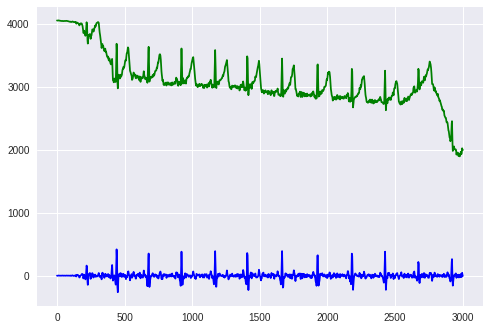

In [0]:
#a, b = butter(5, .05, 'highpass')
#new_nan_df = filtfilt(a, b, nan_array, axis=0)

plt.plot(nan_df, 'g')
plt.plot(new_nan_array, 'b') # # r:red -:line, b:blue s:square
plt.show()

In [0]:
model = RandomForestClassifier(n_estimators=20, criterion='entropy', max_depth=14, min_samples_split=3, min_samples_leaf=4, random_state=None)
#model = SVC(C=1.0, kernel='rbf', gamma='auto', class_weight=None, verbose=False, decision_function_shape='ovr', random_state=0)
#model = DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_split=2, min_samples_leaf=1, random_state=0, class_weight=None)
#model = KNeighborsClassifier(n_neighbors=30, weights='uniform', algorithm='auto', leaf_size=30, p=2)
for i in range(len(Xr_train)):
  Xr_train[i] = np.nan_to_num(Xr_train[i])     
for i in range(len(X_val)):
  X_val[i] = np.nan_to_num(X_val[i])

In [0]:
X_val = X_val.reshape(1812, 3000)
Xr_train = Xr_train.reshape(12840, 3000)
nan_array.shape

(3003,)

In [0]:
model.fit(Xr_train, yr_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=14, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=4, min_samples_split=3,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [0]:
y_val_predict = model.predict(X_val)
y_train_predict = model.predict(Xr_train)

In [0]:
neulog_data = neulog_signal_array(heart_dict)
#neulog_data = get_neulog_features(new_nan_array)

TypeError: ignored

In [0]:
#model.predict(nan_array)
model.predict(neulog_data)

array([[nan, nan, nan, ..., nan, nan, nan]])

In [0]:
from sklearn import metrics
print('Training Accuracy:   {:01.3f}'.format(metrics.accuracy_score(Xr_train, y_train_predict)))

print('Validation Accuracy: {:01.3f}'.format(metrics.accuracy_score(X_val, y_val_predict)))

ValueError: ignored

In [0]:
from sklearn.metrics import accuracy_score
print(accuracy_score(yr_train, y_train_predict))
print(accuracy_score(y_val, y_val_predict))
print(metrics.confusion_matrix(y_val_predict, y_val))
print(y_val_predict)
print(np.unique(y_val_predict, return_counts=True))

0.7883440268866483
0.023730684326710817


ValueError: ignored

In [0]:
metrics.confusion_matrix(np.argmax(y_val_predict, axis=0), np.argmax(y_val, axis=0))

array([[0, 0, 1, 1, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0]])

In [0]:
test_pred_labels = model.predict(test_data)

In [0]:
metrics.confusion_matrix(np.argmax(test_pred_labels, axis=1), np.argmax(test_labels, axis=1))

/usr/local/lib/python2.7/dist-packages/numpy/core/fromnumeric.py:52: FutureWarning: 'argmax' is deprecated. Use 'idxmax' instead. The behavior of 'argmax' will be corrected to return the positional maximum in the future. Use 'series.values.argmax' to get the position of the maximum now.
  return getattr(obj, method)(*args, **kwds)


TypeError: ignored

In [0]:
np.argmax(pred_labels, axis=1)

NameError: ignored

In [0]:
y_pred = model.predict_proba(X_val)
'''
fpr = {}
tpr = {}
roc_auc = {}
for i in range(3):
    fpr[i], tpr[i], _ = metrics.roc_curve(val_labels.iloc[:, i], y_pred[:, i])
    roc_auc[i] = metrics.auc(fpr[i], tpr[i])
    plt.plot(fpr[i], tpr[i], label = str(i))
plt.plot([0, 1], [0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-Class ROC Curve')
plt.legend()
plt.show()
fpr["micro"], tpr["micro"], _ = metrics.roc_curve(val_labels.ravel(), y_pred.ravel())
roc_auc = metrics.auc(fpr["micro"], tpr["micro"])
print(roc_auc)
'''
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(4):
    fpr[i], tpr[i], _ = roc_curve(y_val[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_val.ravel(), y_pred.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

print(roc_auc)

TypeError: ignored